In [2]:
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline 

In [3]:
cat4 = cv2.imread('DATA/CATS_DOGS/train/CAT/4.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

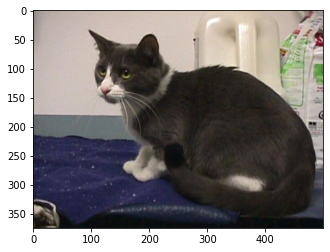

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [13]:
dog = cv2.imread('DATA/CATS_DOGS/train/DOG/2.jpg')

In [14]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

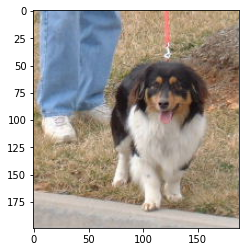

In [15]:
plt.imshow(dog)

In [19]:
dog.max()

255

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                               fill_mode='nearest'
                              )

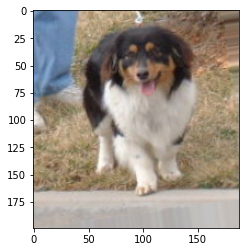

In [31]:
plt.imshow(image_gen.random_transform(dog))

In [32]:
image_gen.flow_from_directory('DATA/CATS_DOGS/')

Found 24994 images belonging to 2 classes.


In [33]:
input_shape = (150,150,3)

In [34]:
from keras.models import Sequential

In [41]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [43]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [46]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/train/',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory('DATA/CATS_DOGS/test/',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [52]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

d:\study\envs\python_cv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


150/150 [==============================] - 27s 176ms/step - loss: 0.7018 - accuracy: 0.4967 - val_loss: 0.6891 - val_accuracy: 0.5104


In [54]:
results.history['accuracy']

[0.5024999976158142]

In [71]:
from keras.models import load_model

In [72]:
new_model = load_model('06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [73]:
dog_file = 'DATA/CATS_DOGS/test/DOG/10005.jpg'

In [74]:
from keras.preprocessing import image

In [75]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [76]:
dog_img = image.img_to_array(dog_img)

In [77]:
dog_img.shape

(150, 150, 3)

In [78]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [79]:
dog_img = dog_img/255

In [80]:
new_model.predict_classes(dog_img)

d:\study\envs\python_cv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [81]:
new_model.predict(dog_img)

array([[0.99387735]], dtype=float32)